In [49]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import typing as ty
from matplotlib.animation import FuncAnimation

In [50]:
f1 = lambda x: -5*x-25
f2 = lambda x: -3*x-10
f3 = lambda x: -x+1
f4 = lambda x: 2*x+4
f5 = lambda x: 5*x-20


def f(functions: ty.Tuple[ty.Callable], x:np.ndarray) -> np.ndarray:
    max = functions[0](x)
    for function in functions[1:]:
        max = np.maximum(max, function(x))
    return max

def subgrad(functions: ty.Tuple[ty.Callable], x:float, dx: float = 1e-6) -> float:
    val = np.max([f(x+dx) for f in functions]) - np.max([f(x) for f in functions])
    return val/dx    

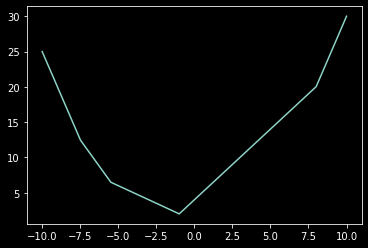

In [51]:
x = np.linspace(-10,10,10000)
objective = f((f1,f2,f3,f4,f5),x)
plt.plot(x, objective)
plt.show()

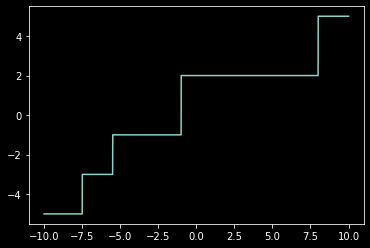

In [52]:
x = np.linspace(-10,10,10000)
subgradients = np.array([subgrad((f1,f2,f3,f4,f5),i) for i in x])
plt.plot(x, subgradients)
plt.show()

# Constant step size

In [53]:
def train(initial_guess, epochs: int):
    lr = (20/4)/np.sqrt(epochs)
    x = initial_guess
    vals = []
    minval = 1e9
    xcord = None
    vals.append(f((f1,f2,f3,f4,f5),x))
    if vals[-1]<minval:
        minval = vals[-1]
        xcord = x
    for epoch in range(epochs):
        x-=subgrad((f1,f2,f3,f4,f5),x) * lr
        vals.append(f((f1,f2,f3,f4,f5),x))
        if vals[-1]<minval:
            minval = vals[-1]
            xcord = x
    return minval, xcord, vals    

n_epochs = 100
minval, xcord, vals = train(-5,n_epochs)
print(f'The minimum value obtained is {minval} which occurs at {xcord}')

The minimum value obtained is 2.0000000011182237 which occurs at -0.9999999994408881


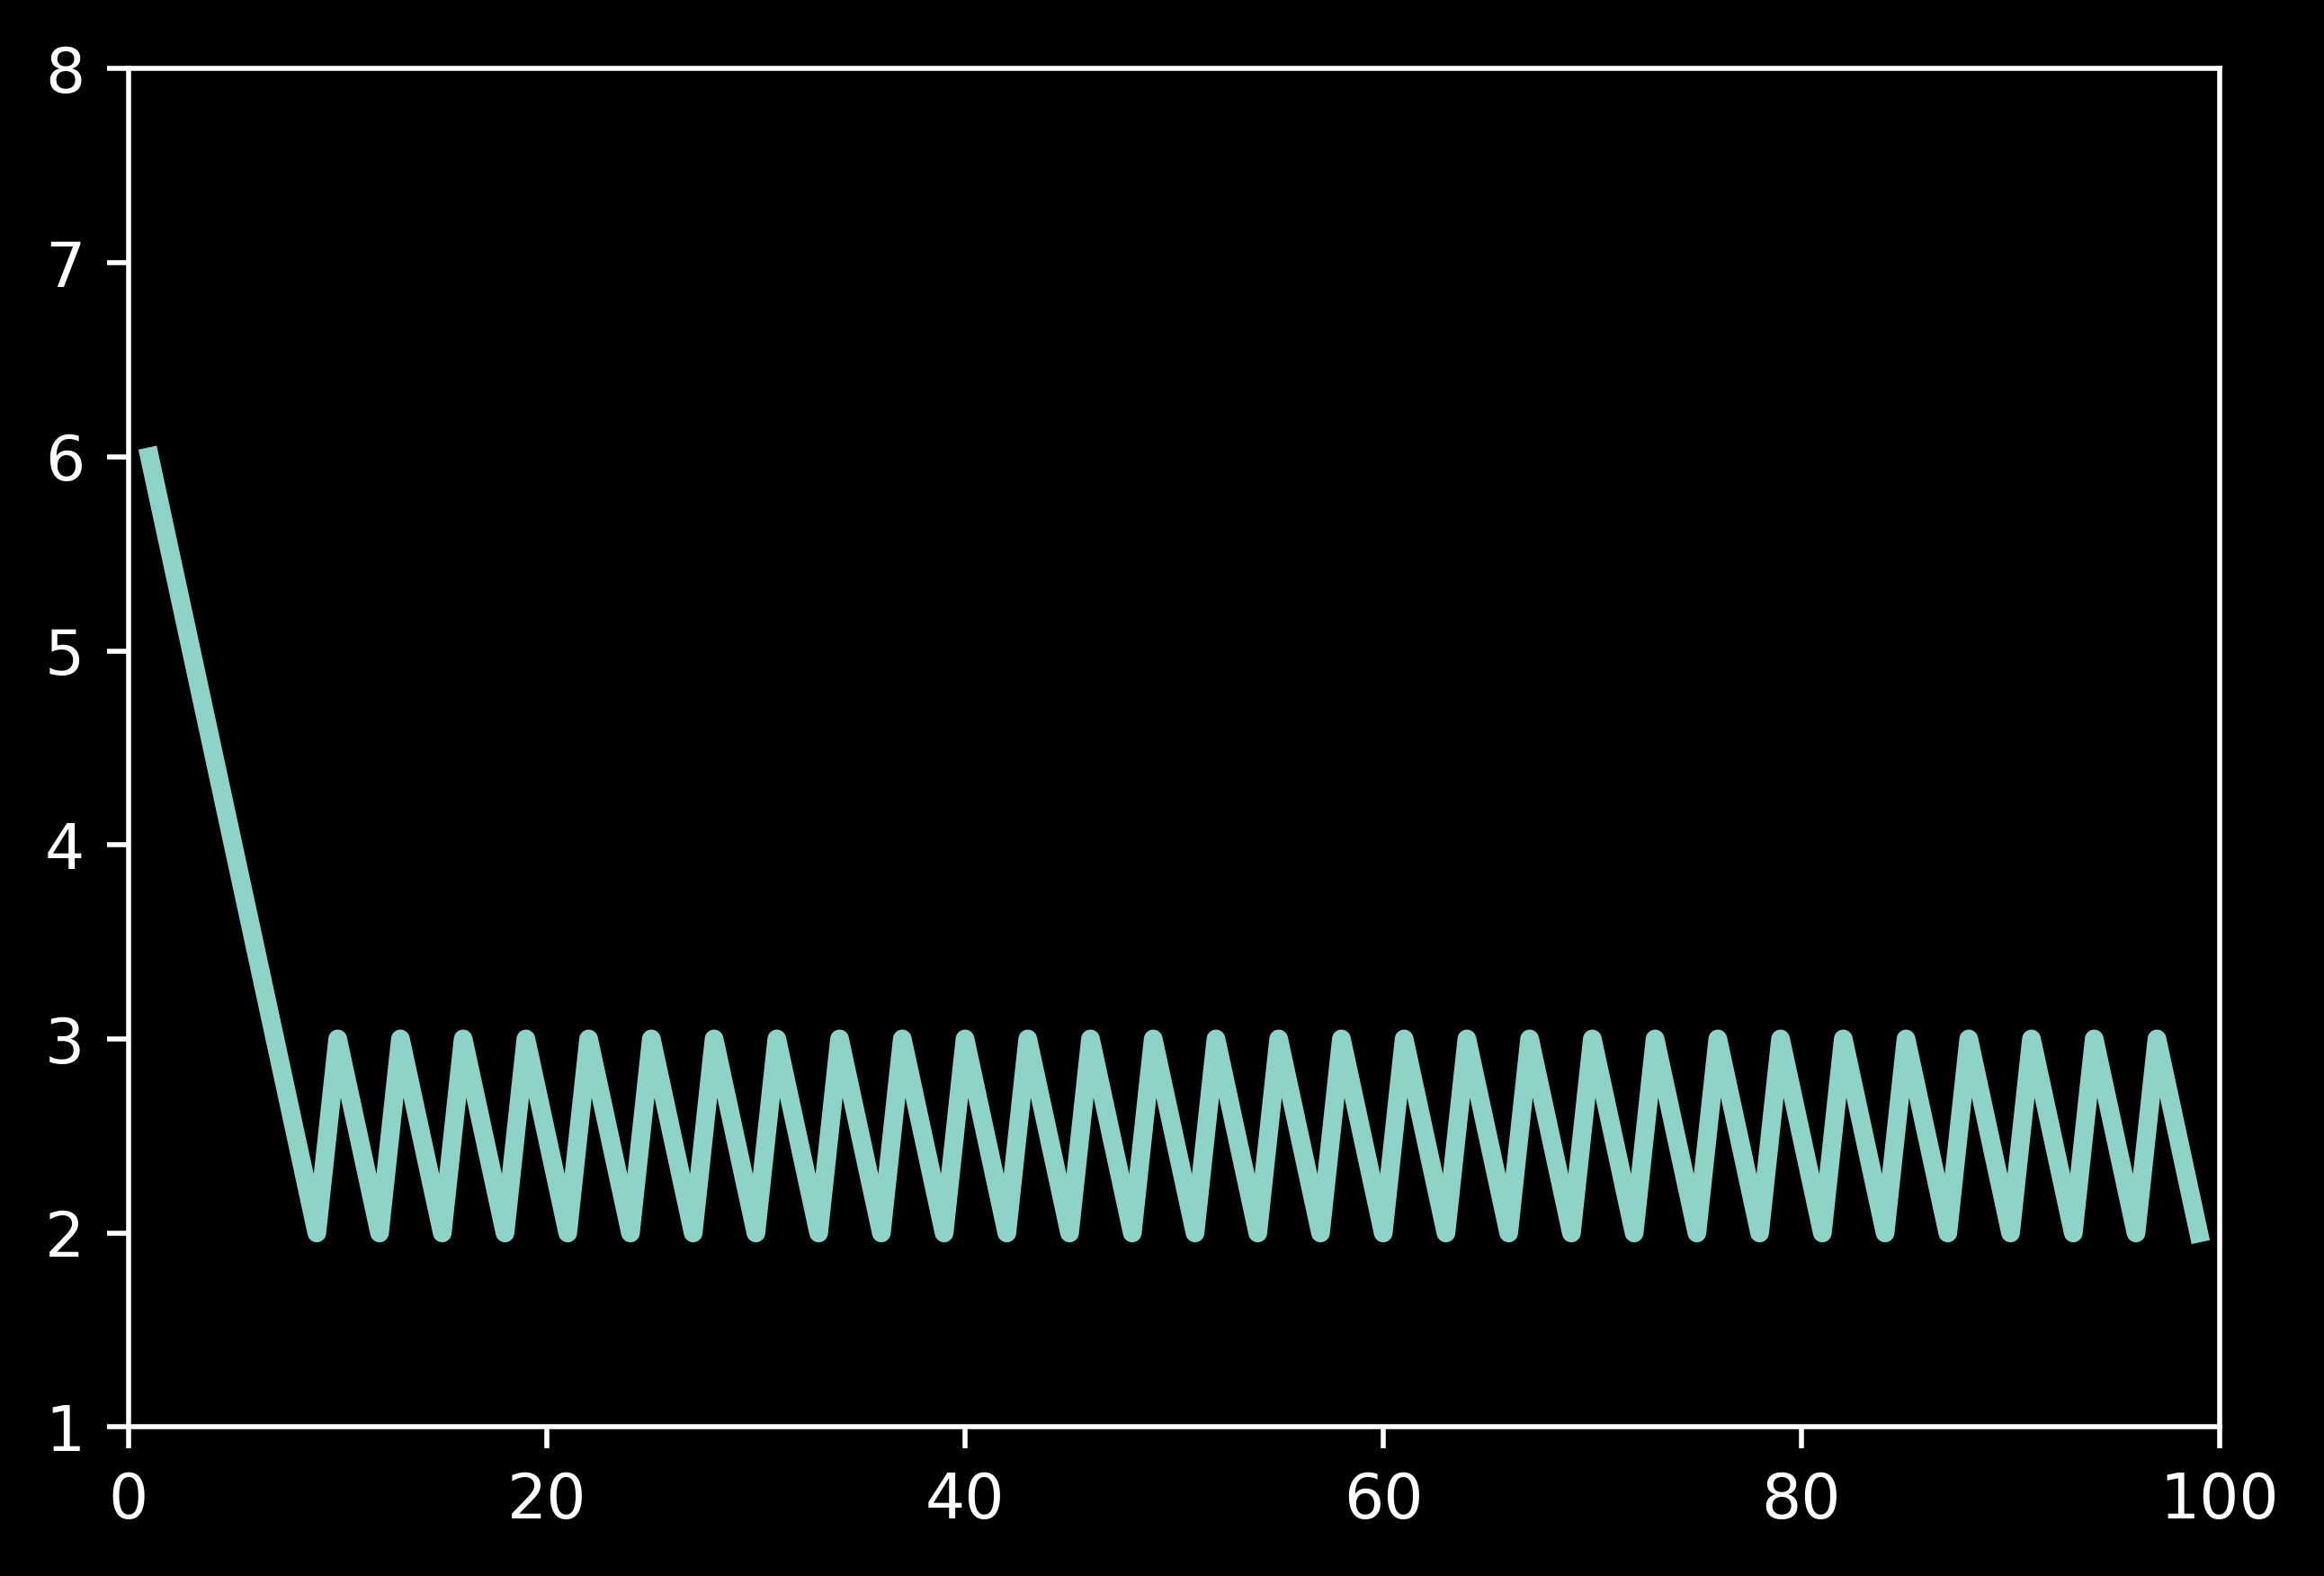

In [54]:
# initializing a figure in 
# which the graph will be plotted
fig = plt.figure(dpi=500) 
   
# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, n_epochs), 
                ylim =(1, 8)) 
  
# initializing a line variable
line, = axis.plot([], [], lw = 3) 
   
# data which the line will 
# contain (x, y)
def init(): 
    line.set_data([], [])
    return line,
   
def animate(i):
    global vals
    x = np.arange(1,i+1)
    y = vals[:i]
    line.set_data(x, y)   
    return line,
   
anim = FuncAnimation(fig, animate, init_func = init,
                     frames = n_epochs, interval = 20)
anim.save('../results/Constant_step_size.mp4', writer = 'ffmpeg', fps = 30)

# Constant step length

In [55]:
def train(initial_guess, epochs: int):
    step_length = 1e-1
    x = initial_guess
    vals = []
    minval = 1e9
    xcord = None
    vals.append(f((f1,f2,f3,f4,f5),x))
    if vals[-1]<minval:
        minval = vals[-1]
        xcord = x
    for epoch in range(epochs):
        x-=np.sign(subgrad((f1,f2,f3,f4,f5),x)) * step_length
        vals.append(f((f1,f2,f3,f4,f5),x))
        if vals[-1]<minval:
            minval = vals[-1]
            xcord = x
    return minval, xcord, vals

epochs = 100
minval, xcord, vals = train(-5,epochs)
print(f'The minimum value obtained is {minval} which occurs at {xcord}')

The minimum value obtained is 2.000000000000001 which occurs at -1.0000000000000009


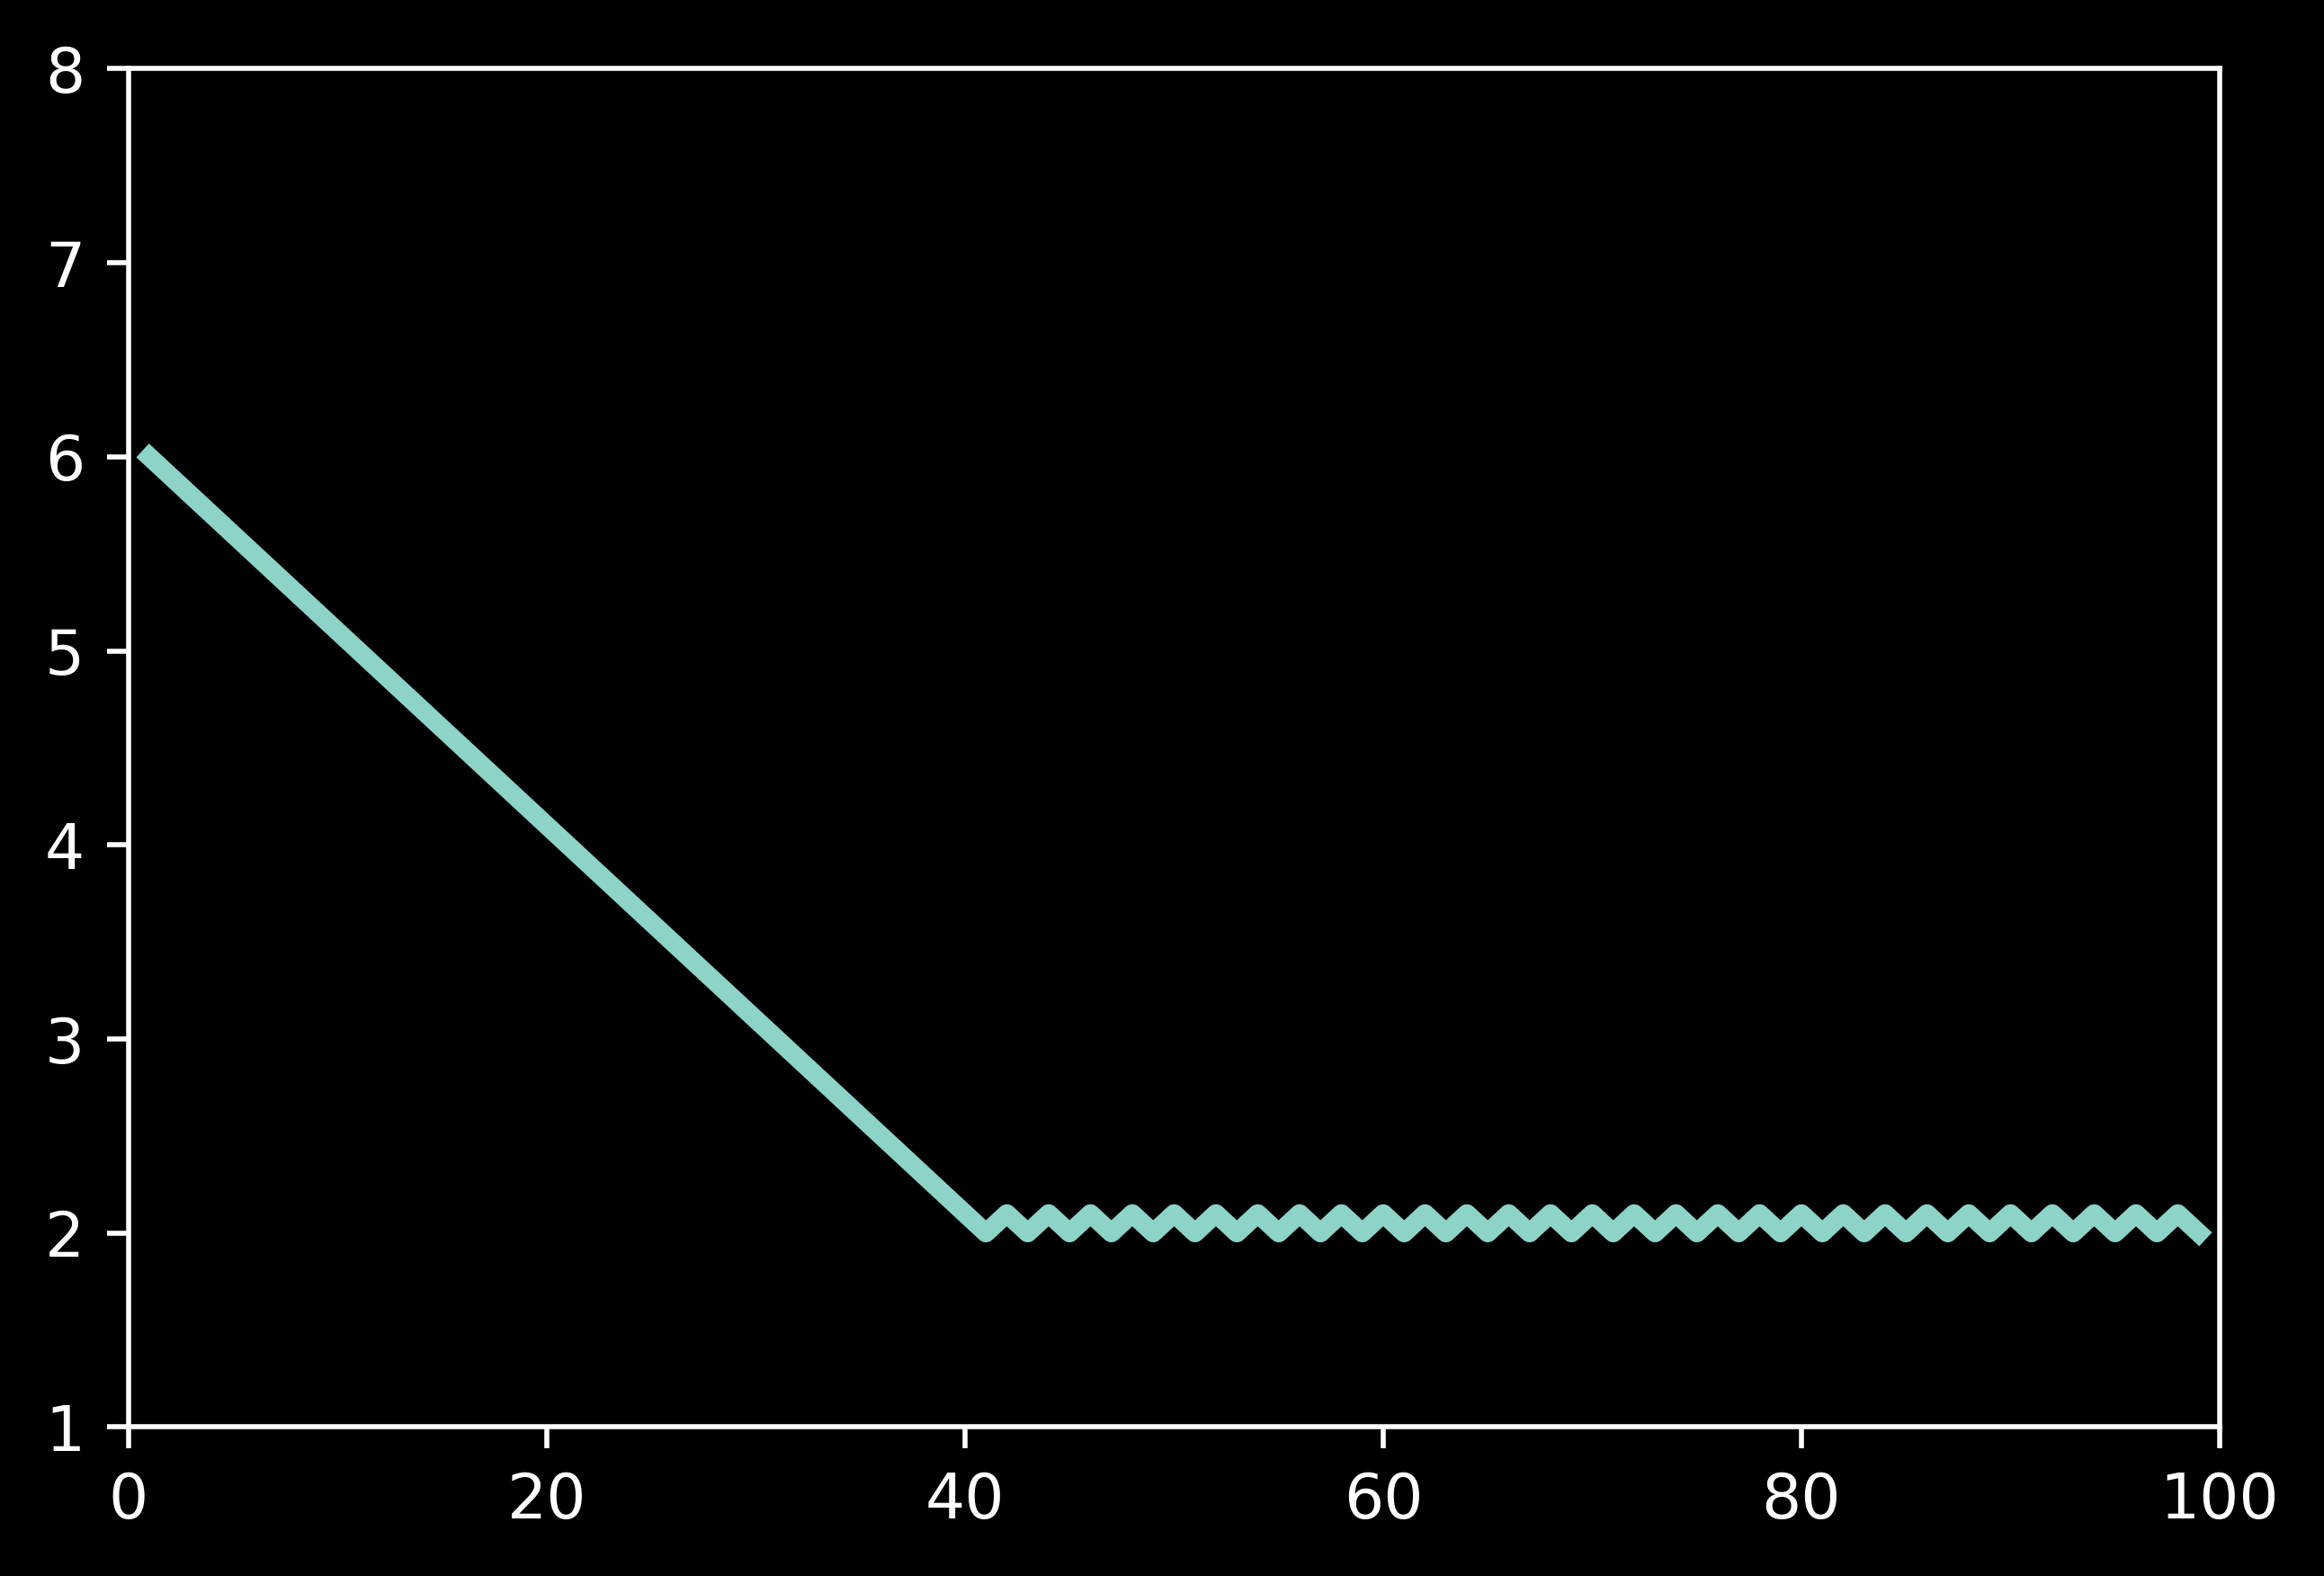

In [56]:
# initializing a figure in 
# which the graph will be plotted
fig = plt.figure(dpi=500) 
   
# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, n_epochs), 
                ylim =(1, 8)) 
  
# initializing a line variable
line, = axis.plot([], [], lw = 3) 
   
# data which the line will 
# contain (x, y)
def init(): 
    line.set_data([], [])
    return line,
   
def animate(i):
    global vals
    x = np.arange(1,i+1)
    y = vals[:i]
    line.set_data(x, y)   
    return line,
   
anim = FuncAnimation(fig, animate, init_func = init,
                     frames = n_epochs, interval = 20)
anim.save('../results/Constant_step_length.mp4', writer = 'ffmpeg', fps = 30)